In [1]:
library(ggpubr)

Loading required package: ggplot2
Loading required package: magrittr


In [78]:
source('floroq_aaa_interaction.R')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  match = col_logical(),
  searchTerm = col_character(),
  drugName = col_character(),
  geneID = col_integer(),
  geneName = col_character(),
  longGeneName = col_character(),
  interaction = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  `Probe Set ID` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  `Probe Set ID` = col_character(),
  `Gene Symbol` = col_character(),
  `mRNA Accession` = col_character(),
  `mRNA  Source` = col_character(),
  `mRna - Description` = col_character(),
  `mRNA - xhyb` = col_character(),
  `GO Biological Process ID` = col_character(),
  `GO Biological Process Term` = col_character(),
  `GO Cellular Component ID` = col_character(),
  `GO Cellular Component Term` = col_character(),
  `GO Molecular Function ID` = col_character(),
  `GO Molecu

In [113]:
t.ranked_diff_genes_med  %>% 
    FSA::headtail(50)  %>%
    mutate(geneName = fct_reorder(geneName, estimate))  ->
    ranked_plot

p_tunica_media <- ranked_plot  %>% 
    ggplot(aes(x=estimate, y = geneName)) +
        geom_segment(aes(x=0, y = geneName, xend = estimate, yend = geneName), color ='gray70', size = 1) +
        geom_point(aes(color = estimate < 0), size = 2) +
       geom_text(aes(label = format(estimate, digits =3)),
                 nudge_x = ifelse(ranked_plot$estimate < 0, -1,1),
                 size = 2.5) +
        geom_text(aes(label = geneName, x = 0),
                  size=3, 
                  nudge_x = ifelse(ranked_plot$estimate < 0, 0.015, -0.015),
                  hjust = ifelse(ranked_plot$estimate < 0, 0, 1),
                  color = 'gray20') +
        scale_color_manual(values=c('red3', 'green4')) +
        labs(title = 'Tunica Media',
             subtitle = 'Log2-Fold Change',
             x = 'Fold Change (log2)',
            caption = 'q < 0.01 for all') +
        guides(col = FALSE) +
        theme_void()+
        #remove_y_axes +
        theme(plot.title = element_text(size = 10, face = 'bold'),
             plot.subtitle = element_text(size = 8))
        #     axis.line = element_blank(),
        #     axis.ticks = element_blank())

In [114]:
t.ranked_diff_genes_adv  %>% 
    FSA::headtail(50)  %>%
    mutate(geneName = fct_reorder(geneName, estimate))  ->
    ranked_plot

p_tunica_adv <- ranked_plot  %>% 
    ggplot(aes(x=estimate, y = geneName)) +
        geom_segment(aes(x=0, y = geneName, xend = estimate, yend = geneName), color ='gray70', size = 1) +
        geom_point(aes(color = estimate < 0), size = 2) +
       geom_text(aes(label = format(estimate, digits =3)),
                 nudge_x = ifelse(ranked_plot$estimate < 0, -1,1),
                 size = 2.5) +
        geom_text(aes(label = geneName, x = 0),
                  size=3, 
                  nudge_x = ifelse(ranked_plot$estimate < 0, 0.015, -0.015),
                  hjust = ifelse(ranked_plot$estimate < 0, 0, 1),
                  color = 'gray20') +
        scale_color_manual(values=c('red3', 'green4')) +
        labs(title = 'Tunica Adventitia',
             subtitle = 'Log2-Fold Change',
             x = 'Fold Change (log2)',
             caption = 'q < 0.05 for all') +
        guides(col = FALSE) +
        theme_void()+
        #remove_y_axes +
        theme(plot.title = element_text(size = 10, face = 'bold'),
             plot.subtitle = element_text(size = 8))
        #     axis.line = element_blank(),
        #     axis.ticks = element_blank())

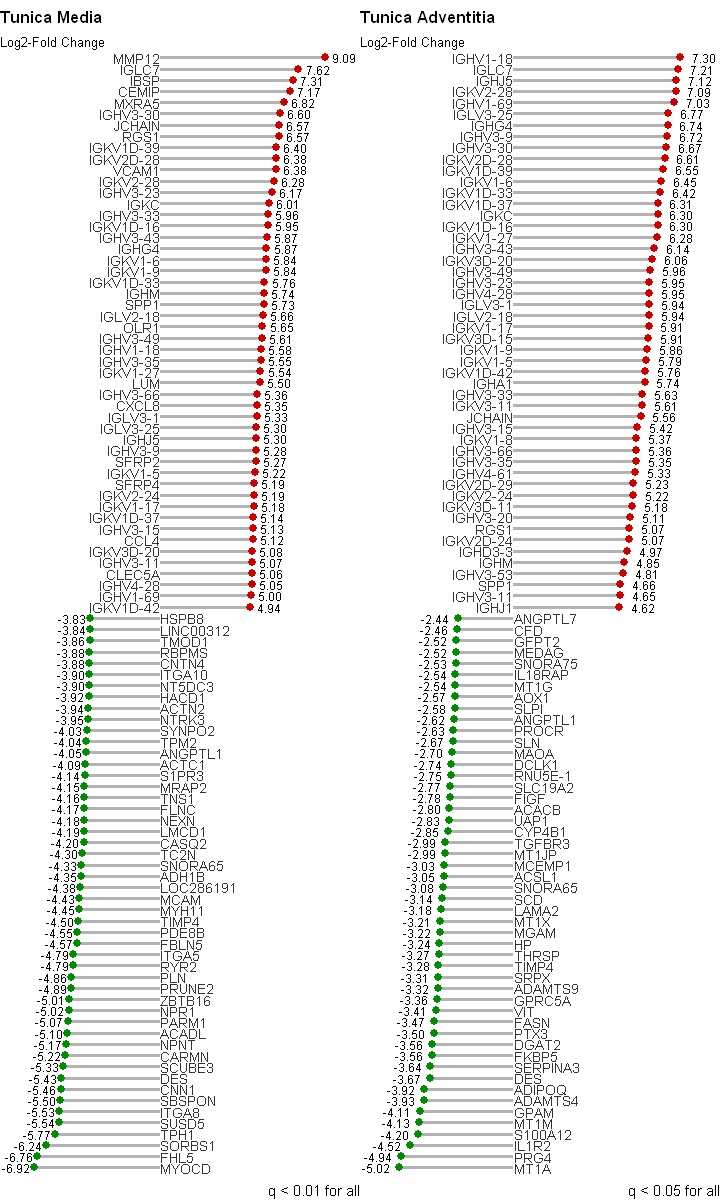

In [116]:
options(repr.plot.width = 6, repr.plot.height = 10)
ggarrange(p_tunica_media, p_tunica_adv)

In [125]:
# run only to save plot
#pdf('../output/lollipop.pdf', width = 8, height = 12)
#print(ggarrange(p_tunica_media, p_tunica_adv))
#dev.off()